#### Linear Regression

Using the [diabetes dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) available through SKLearn:

a) Build a linear regression model in python, using the 2 features with the highest correlation to the output. You can read more about this dataset [here](http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). Plot the MSE vs iteration number, as well as the data and final linear surface (in 3D since there are two features). Hint: in order to plot functions in 3D, use [np.meshgrid](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html).

b) Once the linear regression is complete, implement locally weighted linear regression, and train the model with the following values of $\tau: \{0.01, 0.1, 1, 10\}$. Again, plot the MSE, data, and final linear surface.


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model, datasets
import pandas as pd

[[ 1.          0.1737371   0.18508467  0.33542671  0.26006082  0.21924314
  -0.07518097  0.2038409   0.27077678  0.30173101  0.18788875]
 [ 0.1737371   1.          0.0881614   0.24101317  0.03527682  0.14263726
  -0.37908963  0.33211509  0.14991756  0.20813322  0.043062  ]
 [ 0.18508467  0.0881614   1.          0.39541532  0.24977742  0.26116991
  -0.36681098  0.4138066   0.44615865  0.38867999  0.58645013]
 [ 0.33542671  0.24101317  0.39541532  1.          0.24246971  0.18555783
  -0.17876121  0.25765337  0.39347814  0.39042938  0.44148385]
 [ 0.26006082  0.03527682  0.24977742  0.24246971  1.          0.89666296
   0.05151936  0.54220728  0.51550076  0.32571675  0.21202248]
 [ 0.21924314  0.14263726  0.26116991  0.18555783  0.89666296  1.
  -0.19645512  0.65981689  0.3183534   0.29060038  0.17405359]
 [-0.07518097 -0.37908963 -0.36681098 -0.17876121  0.05151936 -0.19645512
   1.         -0.73849273 -0.398577   -0.2736973  -0.39478925]
 [ 0.2038409   0.33211509  0.4138066   0.25765337

<IPython.core.display.Javascript object>


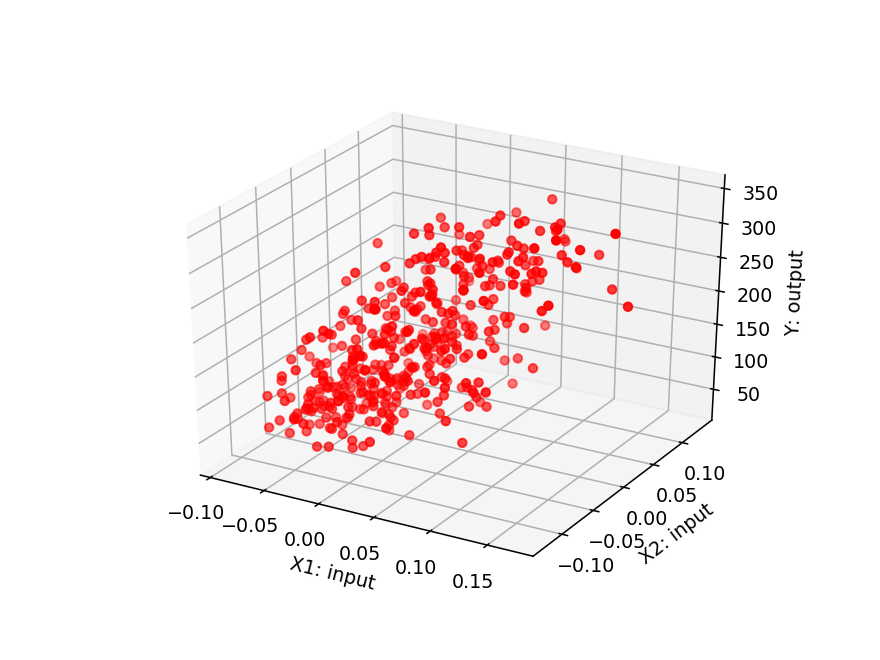

Text(0.5,0,'Y: output')

In [3]:
diabetes = datasets.load_diabetes(return_X_y=False)
n_samples = diabetes.data.shape[0]

# Get the correlation matrix.
corr = np.corrcoef(diabetes.data, diabetes.target, rowvar=False)

# Print the correlation matrix to pick the two parameters with the highest correlation.
print(corr)

ones = np.ones((n_samples,1))
# 2nd and 8th column have the highest correlation.
X = np.append(ones, diabetes.data[:,[2,8]], axis=1)

Y = np.reshape(diabetes.target, (diabetes.target.shape[0], 1))
print('Plotting the data')
fig = plt.figure()

# Add a plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y, c="r", marker="o")
ax.set_xlabel('X1: input')
ax.set_ylabel('X2: input')
ax.set_zlabel('Y: output')

<IPython.core.display.Javascript object>


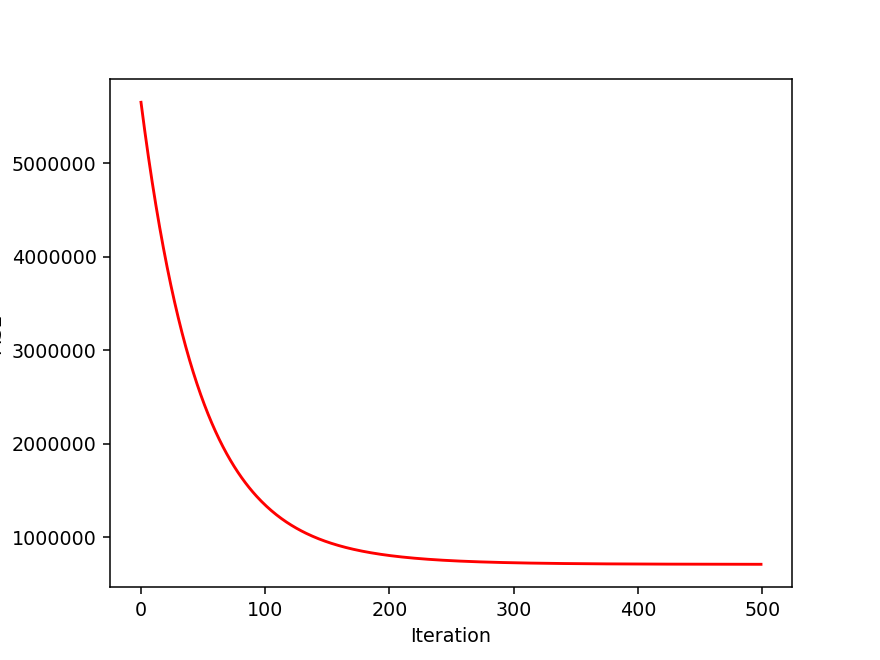

Minimum MSE: [[709310.16020505]]
Final value of theta: [[151.57005127]
 [642.16990353]
 [599.31478078]]


In [5]:
# Initialize theta to random values. Here [10, 10, 10]
theta = np.matrix([10,10,10]).T

# This is number of times that we'll update the weights
T = 500

# Learning rate
alpha = 0.0045

# Keep track of MSE for each iteration
MSE_points = []
iters = []

# Linear regression
for t in range(T):
    theta = theta - alpha*X.T@(X@theta-Y)
    iters.append(t)
    MSE_points.append(( (X@theta-Y).T@(X@theta-Y) )/2)
    

fig = plt.figure()

# add a plot
ax = fig.add_subplot(111)
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE')
ax.plot(np.reshape(iters, (len(iters), 1)), np.reshape(MSE_points, (len(iters), 1)),
                                                           color='red', label='Convergence of GD')
print('Minimum MSE: ' + str(((X@theta-Y).T@(X@theta-Y) )/2))
print('Final value of theta: ' + str(theta))

In [6]:
# Predict the output for each value in the mesh_grid
def mesh_predict(X1, X2, theta):
    Z = np.zeros( (X1.shape[0], X2.shape[0]) )
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            l_x = np.matrix( [1, X1[i,j], X2[i,j]] )
            Z[i,j] = l_x@theta
    return Z

<IPython.core.display.Javascript object>


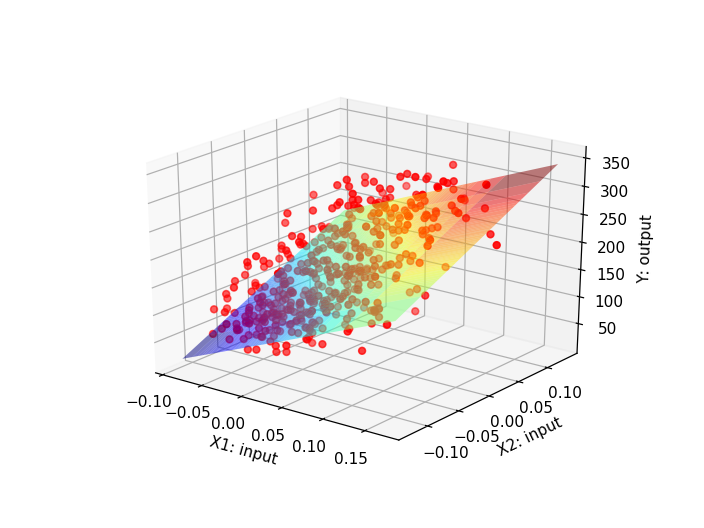

In [55]:
# Plot the predicted model as a surface
fig = plt.figure()

# add a plot
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X1: input')
ax.set_ylabel('X2: input')
ax.set_zlabel('Y: output')
X1, X2 = np.meshgrid(np.sort(X[:,1]), np.sort(X[:,2]))
pred_Z = mesh_predict(X1, X2, theta)
ax.plot_surface(X1, X2, pred_Z, cmap=cm.jet, alpha=0.5, antialiased=True)
ax.scatter(X[:,1], X[:,2], Y, c="r", marker="o")

tau: 0.01


<IPython.core.display.Javascript object>


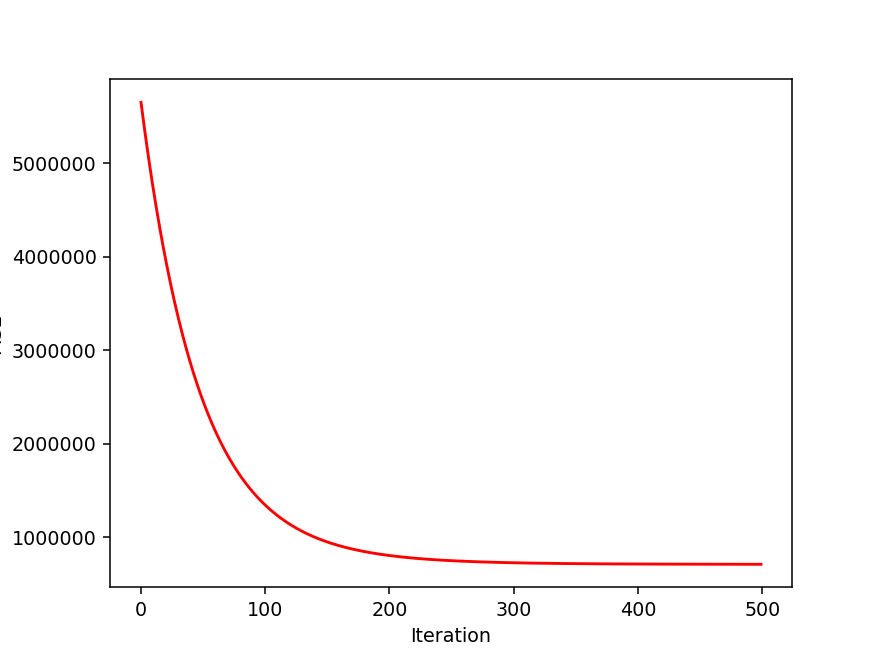

tau: 0.1


<IPython.core.display.Javascript object>


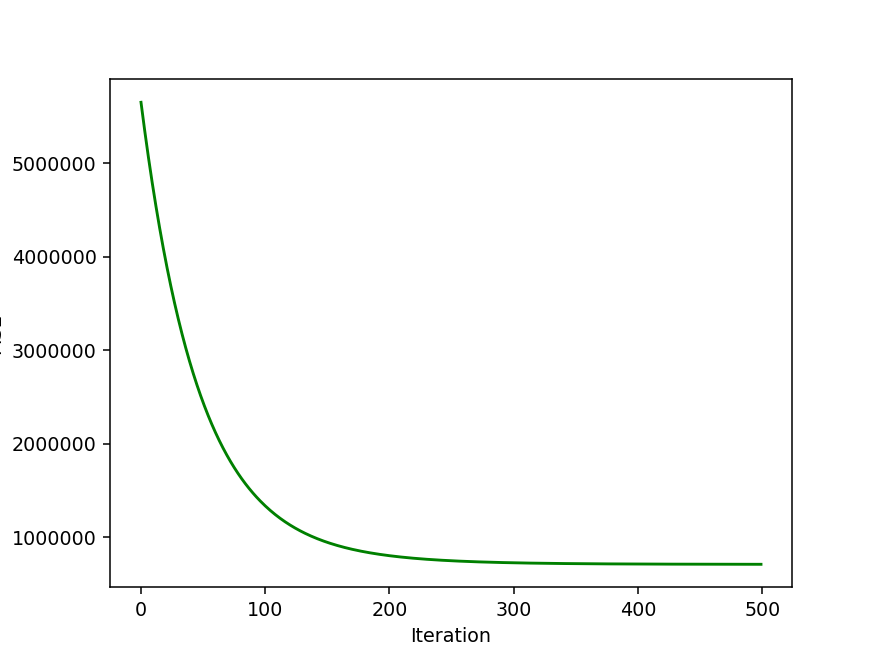

tau: 1


<IPython.core.display.Javascript object>


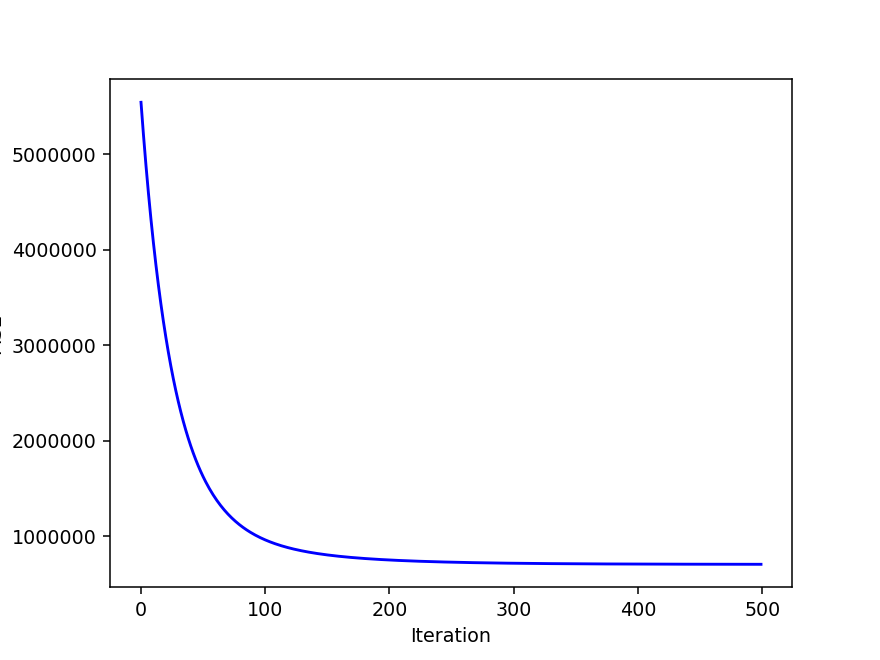

tau: 10


<IPython.core.display.Javascript object>


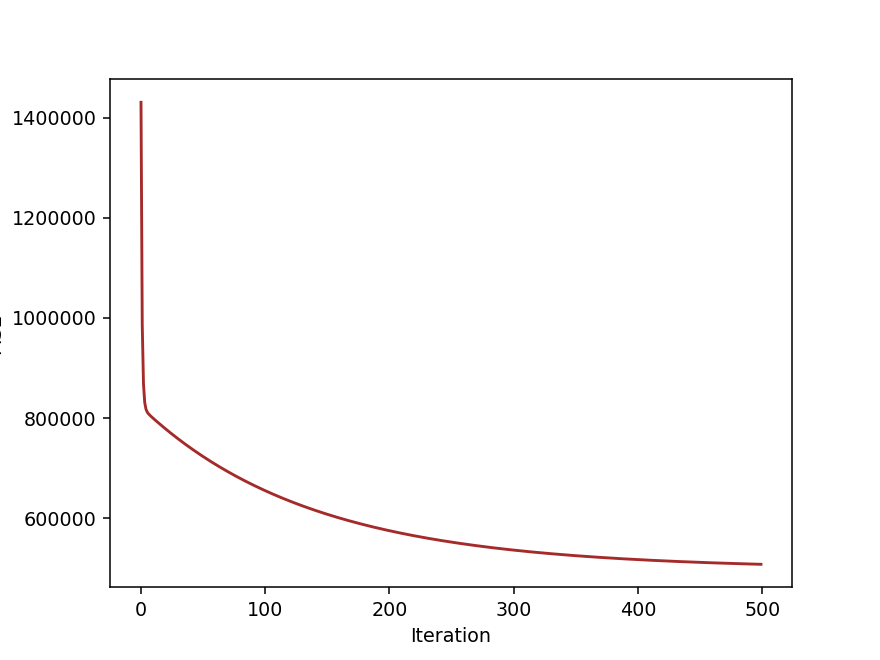

In [7]:
theta = np.matrix([10,10,10]).T

# This is number of times that we'll update the weights
T = 500

# Learning rate
alpha = 0.0045

# MSE for each each example against each value of tau
MSE_points = np.zeros( ( X.shape[0], T ) )

clr = ['red', 'green', 'blue', 'brown']
tau_arr = [0.01,0.1,1,10]
for tau, tau_ind in zip(tau_arr,range(len(tau_arr))):
    print('tau: ' + str(tau))
    # One figure for each value of tau
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('MSE')
    for s in range(X.shape[0]):
        w = np.exp( -( np.sum(np.square(X - X[s,:]), axis=1) ) / 2*(tau**2) )
        w = np.reshape(w, (w.shape[0], 1))
        theta = np.matrix([10,10,10]).T
        for t in range(T):
            # Learning rule
            theta = theta - alpha*X.T@ (np.multiply((X@theta-Y),w))
            MSE_points[s][t] = ((np.square(X@theta-Y)).T@w)/2
            
    ax.plot(np.reshape(np.arange(T), (T, 1)), np.reshape(np.sum(MSE_points, axis=0)/442, (T, 1)),
            color=clr[tau_ind], label='Convergence of LWR for different tau')

In [57]:
# Fit the LWR model for the mesh_grid of x values
def train_model_LWR(X1, X2, Y, tau):
    # This is number of times that we'll update the weights
    T = 500
    # Learning rate
    alpha = 0.0045
    theta = np.matrix([10,10,10]).T
    Z = np.zeros( (X1.shape[0], X2.shape[0]) )
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            l_x = np.matrix( [1, X1[i,j], X2[i,j]] )
            # calculate the weights
            w = np.exp( -( np.sum(np.square(X - l_x), axis=1) ) / (2*(tau**2)) )
            w = np.reshape(w, (w.shape[0], 1))
            theta = np.matrix([10,10,10]).T
            for t in range(T):
                theta = theta - alpha*X.T@ (np.multiply((X@theta-Y),w))
            #print(theta)
            Z[i,j] = l_x@theta
    return Z

tau: 0.01


<IPython.core.display.Javascript object>


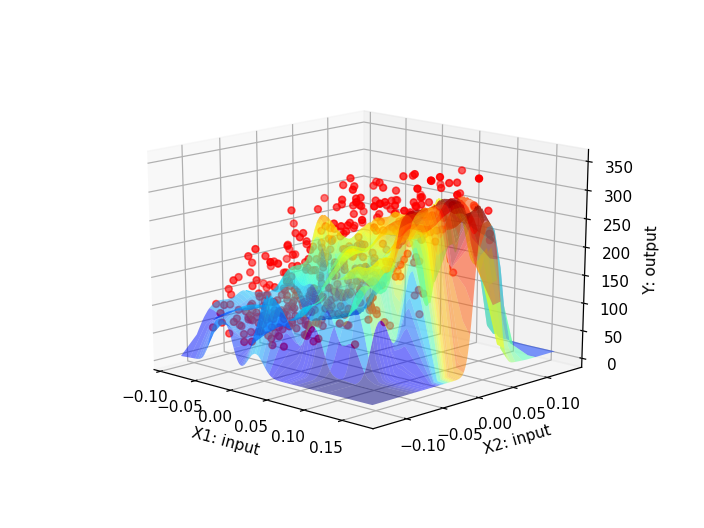

tau: 0.1


<IPython.core.display.Javascript object>


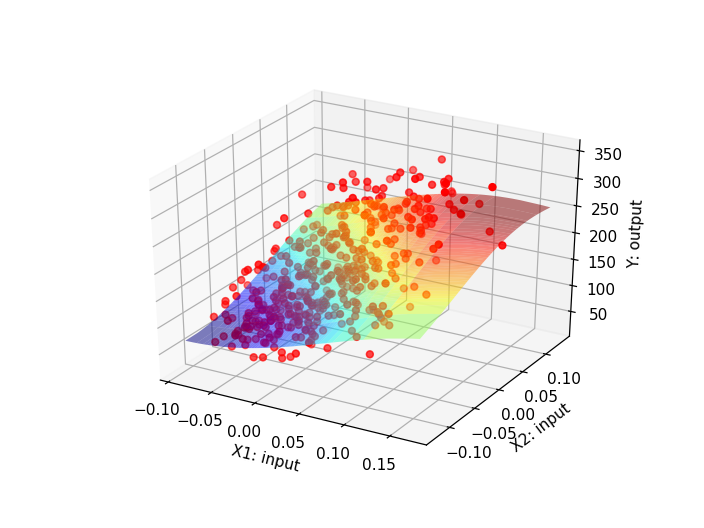

tau: 1


<IPython.core.display.Javascript object>


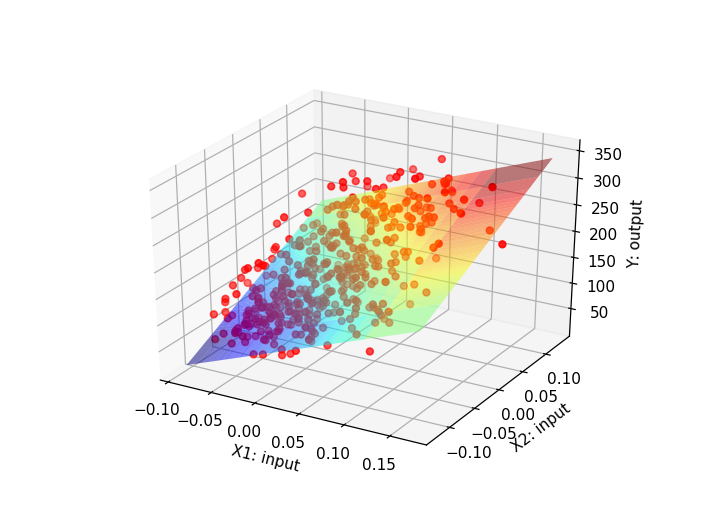

tau: 10


<IPython.core.display.Javascript object>


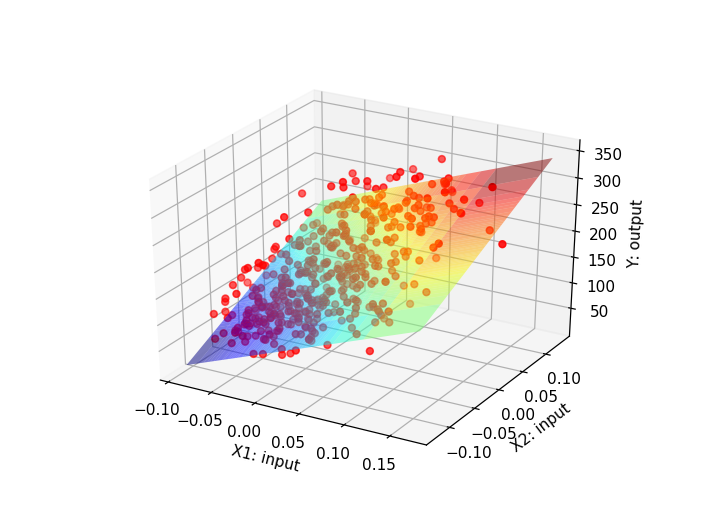

In [58]:
tau_arr = [0.01,0.1,1,10]
for tau, tau_ind in zip(tau_arr,range(len(tau_arr))):
    print('tau: '+ str(tau))
    fig = plt.figure()

    # add a plot
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X1: input')
    ax.set_ylabel('X2: input')
    ax.set_zlabel('Y: output')
    X1, X2 = np.meshgrid(np.sort(X[:,1]), np.sort(X[:,2]))
    pred_Z = train_model_LWR(X1, X2, Y, tau)
    ax.plot_surface(X1, X2, pred_Z, cmap=cm.jet, alpha=0.5, antialiased=True)
    ax.scatter(X[:,1], X[:,2], Y, c="r", marker="o")

#### Logistic Regression**

Show that for a linearly separable data set (i.e. the data can be partitioned by a linear function) the maximum likelihood solution for the logistic regression model is obtained by 1) finding a vector $\mathbf{w}$ whose decision boundary $\mathbf{w}^T\mathbf{x}=0$ separates the classes and 2) taking the magnitude of $\mathbf{w}$ to infinity.

#### Answer:
In logistic regression, the hypothesis is given by $h_\theta (x) = g(\theta^Tx)$, where 
$$g(z) = \frac{1}{1+e^{-z}}$$
is the sigmoid function i.e. we are limiting the output of $\theta^Tx$ between $0$ and $1$. This gives us the probability of output being $1$ or a positive example $P(y=1|x;\theta)$.
Note that the vector $\theta$ is the vector $w$ that we are looking for since $\theta^Tx = 0$ separates the classes as shown in the equation below:
\begin{equation}
y = \begin{cases}
1 & \text{ if } h_\theta (x) \ge 0.5 \\
0 & \text{ o.w.} \\
\end{cases}
\end{equation}
The sigmoid function only gives us probability of output being 1. But we want to classify the output in just two categories i.e. we want a definite answer of either $0$ or $1$. This is achieved by taking the magnitude of $\theta = w$ to infinity. This way, for every value of $x$, we get $w^Tx = \pm \infty$ or $h_w(x) = \{0,1\}$


#### The exponential family**

Recall that the poisson distribution is a discrete probability distribution that can model the number of times an event occurs in a given time or space interval.

Suppose that an event can occur $1, 2, ... y$ times in an interval. The average number of events that occur in that interval are denoted $\lambda$ (not to be confused with eigen values), which is called the event rate or rate parameter. Thus, for a poisson distribution, the probability of observing $y$ events in said interval is given by

$$P(y;\lambda) = e^{-\lambda}\frac{\lambda^y}{y!}$$

With that in mind, consider the following problem. Given bicycle bridge crossing data (i.e. counts of the number of bicycles that cross a given bridge), the task is to build a model that estimates the number of bicycle crossings in a day given the High Temp (°F), the Low Temp (°F) and the Precipitation for that day.


a) Is the poisson distribution in the exponential family? If so, construct a GLM to solve this problem.

#### Answer:
Yes, the poisson distribution is in the exponential family. 
The GLM can derived as follows:
$$\begin{split}
P(y;\lambda) &= e^{-\lambda}\frac{\lambda^y}{y!} \\
&= \frac{1}{y!}exp(-\lambda + y\log \lambda) \\
&= \frac{1}{y!}exp(y\log\lambda - \lambda)
\end{split}
$$

b) What are the natural parameter of the distribution, the sufficient statistic, the log partition function, and $b(y)$.

#### Answer:
The natural parameter: $\eta = \log \lambda$.  
The sufficient statistic: $T(y) = y$.  
The log partition function $a(\eta) = \lambda$.  
$b(y) = 1/y!$.

c) What is the canonical response function for this problem?

#### Answer:
The canonical response function is $E(y;\eta)$ given by:  
$$\lambda = g(\eta) = e^\eta$$
As we assume $\eta = \theta^Tx$: 
$$g(\eta) = e^{\theta^Tx}$$

d) Update the course repo or download the dataset [directly](https://github.com/drmaj/CAP5610/tree/master/Datasets) and develop a GLM based on the poisson distribution in python using the NYC Bicycle Crossing Dataset. Create a model for each bridge, and a model for the total.

#### Answer:
First we find the likelihood and then maximize log likelihood it using gradient ascent. The likelihood function is given by:
$$
L(\theta) = \prod_{i=1}^{m}\frac{1}{y!}exp(y^{(i)}\log \lambda^{(i)} - \lambda^{(i)})
$$
The log likelihood function $l(\theta)$ is given as follows:
$$
l(\theta) = \log (L(\theta)) = \sum_{i=1}^{m}(\log \frac{1}{y^{(i)}!} + y^{(i)}\log \lambda^{(i)} - \lambda^{(i)})
$$
Putting the value of $\lambda = e^{\theta^Tx}$.
$$
l(\theta) = \sum_{i=1}^{m}(\log \frac{1}{y^{(i)}!} + y^{(i)}\theta^Tx^{(i)} - e^{\theta^Tx^{(i)}})
$$
To maximize it, we take the gradient w.r.t. $\theta_j$. Since, the term $\log \frac{1}{y^{(i)}!}$ is constant with respect to $\theta_j$ we can drop it.
$$
\begin{split}
\frac{\partial}{\partial \theta_j}l(\theta) &= \sum_{i=1}^{m}(y^{(i)}x_j^{(i)} - x_j^{(i)}e^{\theta^Tx^{(i)}}) \\
&= \sum_{i=1}^{m}((y^{(i)} - e^{\theta^Tx^{(i)}})x_j^{(i)})
\end{split}
$$
We will use iteratively reweighted least squares (IRLS) to estimate $\theta$ which is given by:
$$
\theta_j := \theta_j - H^{-1}\frac{\partial l(\theta)}{\partial \theta_j}
$$
$H$ is the Hessian and calculated as follows:
$$
H = \mathbf{xWx}^T
$$
and $\mathbf{W}$ is a diagonal matrix referred to as weight matrix. It is given by:
$$
\mathbf{W} = diag(e^{\theta^Tx})
$$

In [94]:
df=pd.read_csv('nyc-east-river-bicycle-counts.csv')
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [100]:
X = []
n_samples = len(df.index)
X.append( (df['High Temp (°F)'].values + df['Low Temp (°F)'].values)/2 )
X.append([float(i.replace('T', '0').replace('(S)', '')) for i in df['Precipitation'].values])
X = np.array(X).T

Y_Brook = np.array(df['Brooklyn Bridge'].values).reshape(n_samples,1)
Y_Manh = np.array(df['Manhattan Bridge'].values).reshape(n_samples,1)
Y_Will = np.array(df['Williamsburg Bridge'].values).reshape(n_samples,1)
Y_Queen = np.array(df['Queensboro Bridge'].values).reshape(n_samples,1)
Y_Total = np.array(df['Total'].values).reshape(n_samples,1)

ones = np.ones((n_samples,1))
X = np.append(ones, X, axis=1)

In [101]:
# This is number of times that we'll update the weights
T = 100

################################# Brooklyn #############################
# Initialize theta to random values. Here [1, 1, 1]
theta = np.matrix([1,1,1]).T

# Poisson regression
for t in range(T):
    W = np.diag(np.matrix(np.exp(X@theta)).A1)
    H = -(X.T@W@X)
    inv_H = np.linalg.inv(H)
    theta = theta - inv_H@(X.T@ (Y_Brook - np.exp(X@theta)))
    
print('Model for Brooklyn Bridge')
print(theta)
testx = np.array([1, 40, 0.01]).reshape(1,3)
print('Test example output: ' + str(np.exp(testx@theta)))

################################# Manhattan #############################
# Initialize theta to random values. Here [1, 1, 1]
theta = np.matrix([1,1,1]).T

# Poisson regression
for t in range(T):
    W = np.diag(np.matrix(np.exp(X@theta)).A1)
    H = -(X.T@W@X)
    inv_H = np.linalg.inv(H)
    theta = theta - inv_H@(X.T@ (Y_Manh - np.exp(X@theta)))
    
print('Model for Manhattan Bridge')
print(theta)
testx = np.array([1, 50, 0.04]).reshape(1,3)
print('Test example output: ' + str(np.exp(testx@theta)))

################################# Williamsburg #############################
# Initialize theta to random values. Here [1, 1, 1]
theta = np.matrix([1,1,1]).T

# Poisson regression
for t in range(T):
    W = np.diag(np.matrix(np.exp(X@theta)).A1)
    H = -(X.T@W@X)
    inv_H = np.linalg.inv(H)
    theta = theta - inv_H@(X.T@ (Y_Will - np.exp(X@theta)))
    
print('Model for Williamsburg Bridge')
print(theta)
testx = np.array([1, 50, 0.01]).reshape(1,3)
print('Test example output: ' + str(np.exp(testx@theta)))

################################# Queensboro #############################
# Initialize theta to random values. Here [1, 1, 1]
theta = np.matrix([1,1,1]).T

# Poisson regression
for t in range(T):
    W = np.diag(np.matrix(np.exp(X@theta)).A1)
    H = -(X.T@W@X)
    inv_H = np.linalg.inv(H)
    theta = theta - inv_H@(X.T@ (Y_Queen - np.exp(X@theta)))
    
print('Model for Queensboro Bridge')
print(theta)
testx = np.array([1, 50, 0.01]).reshape(1,3)
print('Test example output: ' + str(np.exp(testx@theta)))

################################# Total #############################
# Initialize theta to random values. Here [1, 1, 1]
theta = np.matrix([1,1,1]).T

# Poisson regression
for t in range(T):
    W = np.diag(np.matrix(np.exp(X@theta)).A1)
    H = -(X.T@W@X)
    inv_H = np.linalg.inv(H)
    theta = theta - inv_H@(X.T@ (Y_Total - np.exp(X@theta)))
    
print('Model for Total Bridge')
print(theta)
testx = np.array([1, 50, 0.01]).reshape(1,3)
print('Test example output: ' + str(np.exp(testx@theta)))

Model for Brooklyn Bridge
[[ 6.60913894]
 [ 0.02268942]
 [-3.45523414]]
Test example output: [[1776.07886856]]
Model for Manhattan Bridge
[[ 7.2347541 ]
 [ 0.02173414]
 [-3.19071423]]
Test example output: [[3618.56329283]]
Model for Williamsburg Bridge
[[ 7.39021069]
 [ 0.02184134]
 [-2.44429384]]
Test example output: [[4711.84457421]]
Model for Queensboro Bridge
[[ 7.27207201]
 [ 0.01715053]
 [-2.18554616]]
Test example output: [[3320.07659935]]
Model for Total Bridge
[[ 8.54850818]
 [ 0.02085805]
 [-2.72037037]]
Test example output: [[14245.6524033]]
